# The Boston Housing Dataset
### Machine Learning and Statistics Assessment 2019
#### Due December 13th 2019
#### Simon McLain G00364775
### Introduction to the Boston Dataset
The Boston house-price was utilised by David Harrison Jr. and Daniel L. Rubinfeld in their paper "Hedonic Housing Prices and the Demand for Clean Air" published in the Journal of Environmental Economics and Management 5, pg. 82-102 in 1978. Their purpose was to derive an equation to express the willingness to pay more for housing if buyers or renters percieve improved air quality. The dataset containing 506 data points for 13 numeric/ categorical predictive attributes was used to identify price factors according to the premises internal and external characteristics affecting it. The fourteenth attritbute "Median Value" is the dependent variable, their hypothesis being that the numeric/ categorical attributes within the dataset could be used to predict the "Median Value" of housing. 

A link to their full article in provided in the references section along with blogs visited while conducting this assignment.  

The dataset, now commonly referred to the Boston Housing Dataset is often used machine learning blogs and papers to discuss regression analysis

![title](images\pic.jpg)
##### The image is released free of copyrights under Creative Commons CC0


## Import Libraries 

In [1]:
# Import libraries for analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy import stats
import keras as kr
%matplotlib inline

# Hide warnings to improve readibility
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Load the Boston dataset

In [2]:
# Import Boston Housing dataset from SciKit Learn
from sklearn.datasets import load_boston
dataset = load_boston()

In [3]:
# discover the keys for the dataset
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Convert the dataset to a pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
# Add a new column to the dataframe for Median Values of housing
df['MEDV'] = dataset.target

# Describe

In [6]:
# Description of the attributes of Boston Housing datase
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [45]:
# Average Median Value of Housing
x = df.loc[:,"MEDV"].mean()
print("The Median Housing Value in thousands is: ", "$", round(x, 2))

The Median Housing Value in thousands is:  $ 22.53


In [8]:
print("Table 1. Full Descriptive Statistics")
df.describe().round(2)

Table 1. Full Descriptive Statistics


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Plot 1


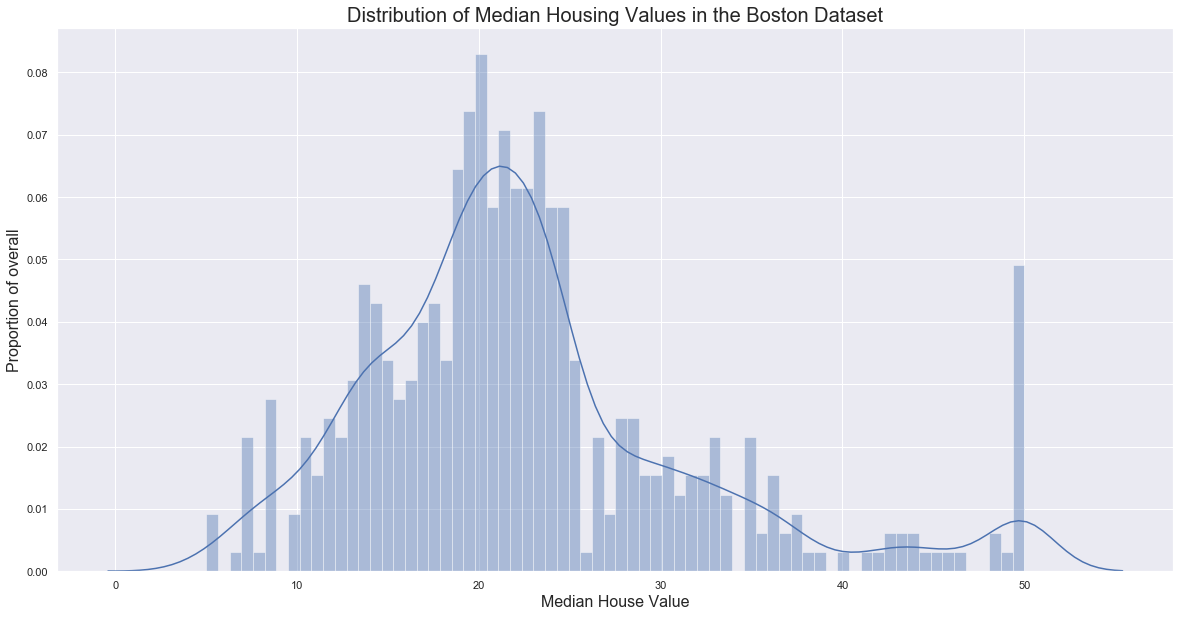

In [52]:
sns.set(rc={'figure.figsize':(20,10)})
x = pd.Series(df['MEDV'])
ax = sns.distplot(x, bins=70, color='b', norm_hist=False, hist=True)
plt.title('Distribution of Median Housing Values in the Boston Dataset', fontsize=20)
plt.ylabel('Proportion of overall', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)
print('Plot 1')

### Summary of Descriptive Statistics
The median housing value is $22,530. Overall, as displayed in Plot  the median values appear broadly to be normally distributed with a positive skew and some outliers at the higher end of values. 

# Infer

## Is there a significant difference in median house prices between houses along the Charles river and those that aren't?
![title](images\CHAS.jpg)

###### A watercolor illustration made for the Boston Esplanade Association.FRANK COSTANTINO
###### https://www.bostonglobe.com/arts/2012/03/04/make-better-esplanade-harness-citizens-passion/Z8hyWWzjJbJ9vCcvvyNaiM/story.html

### Summary
Several Statisical Analysis Techniques were used to determine the probablity of there being no significant difference between the median value of houses along the Charles river and those house that where not, (i.e. the null hypothesis). If the probablity that the two groups are samples from the same population is less than 0.05 then the null hypothesis can be rejected and the conclusion made that, based on the available observations, that there **is** a significant difference between the median value of houses. 

The conclusion using a variety of statistical techniques for cross-validation is that there is a statistical difference in median values for houses located on the Charles river and houses not located on the Charles river based on the observations within this dataset. 

Let's begin with some descriptive statistics. The plot below tells us that significantly fewer houses in the dataset are located along the Charles river, 35 versus 471. Houses not along the Charles river seem to follow a positively skewed normal distribution with a positive skew. The histogram in Plot 2 for houses along the Charles river is not very informative and should not be used to draw any conclusions.

Some deeper statistical analysis will be beneficial. 

#### Descriptive Statistics
It is clear that housing along the Charles river (MEDV_river in Table 2) have a higher mean value and a greater proportion of housing in the 3rd quartile than housing not along the Charles river (MEDV_no_river in Table 2). But this does not indicate that they two groups are not samples from the same overall population. 

In [10]:
# Slice CHAS column according to boolean values. 1 = along river, 0 = not along river
river_stats = df[df['CHAS']==1].describe()
river_stats.rename(columns=lambda x:x+'_river',inplace=True) 
no_river_stats = df[df['CHAS']==0].describe()
no_river_stats.rename(columns=lambda x:x+'_no_river',inplace=True) 
# create a new array containing 
statistics = pd.concat([river_stats, no_river_stats], axis=1)

In [59]:
desc = statistics.loc[:, ['MEDV_river', 'MEDV_no_river']]
print("Table 2. Descriptive statistics for MEDV according to CHAS showing differences between means of the groups")
desc

Table 2. Descriptive statistics for MEDV according to CHAS showing differences between means of the groups


,MEDV_river,MEDV_no_river
count,35.000000,471.000000
mean,28.440000,22.093843
std,11.816643,8.831362
min,13.400000,5.000000
25%,21.100000,16.600000
50%,23.300000,20.900000
75%,33.150000,24.800000
max,50.000000,50.000000


The histogram below, showing the distribtion of housing values in the two groups again shows they are centred around different means, however this still could simply be two samples from the same overall population.

Plot 2. Histograms showing the distribution of Median values of houses on the Charles river and not along the river


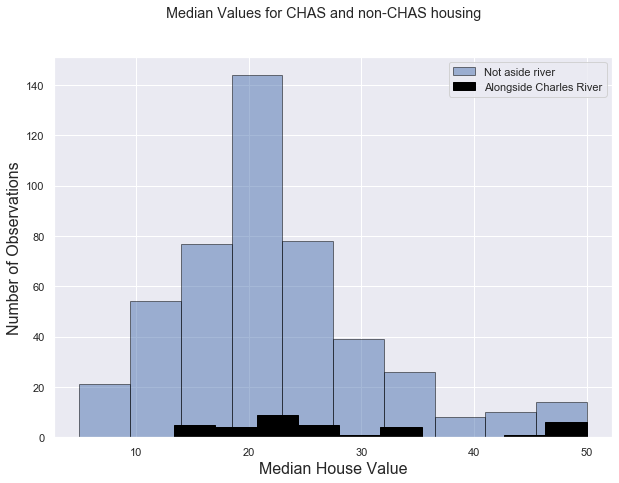

In [12]:
print('Plot 2. Histograms showing the distribution of Median values of houses on the Charles river and not along the river')
fig = plt.figure()
fig.suptitle('Median Values for CHAS and non-CHAS housing')
df[df['CHAS']==0].MEDV.plot(kind='hist',color='b',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['CHAS']==1].MEDV.plot(kind='hist',color='black',edgecolor='black', figsize=(10,7))
L = plt.legend()
L.get_texts()[0].set_text('Not aside river')
L.get_texts()[1].set_text('Alongside Charles River')
plt.ylabel('Number of Observations', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)
plt.show()

Boxplots help us to visualise the distribution of Median housing values in the two samples. We can see that housing along the Charles river has a higher median value, as well as a greater spread or standard deviation from the mean value. Housing not along the Charles river has a small spread in values but a greater number of outliers. The boxplot is useful in visualising the data, however based solely on this data the Charles river housing could reasonably be argued to be within the range of outliers for houses not on the Charles river. 

Plot 3


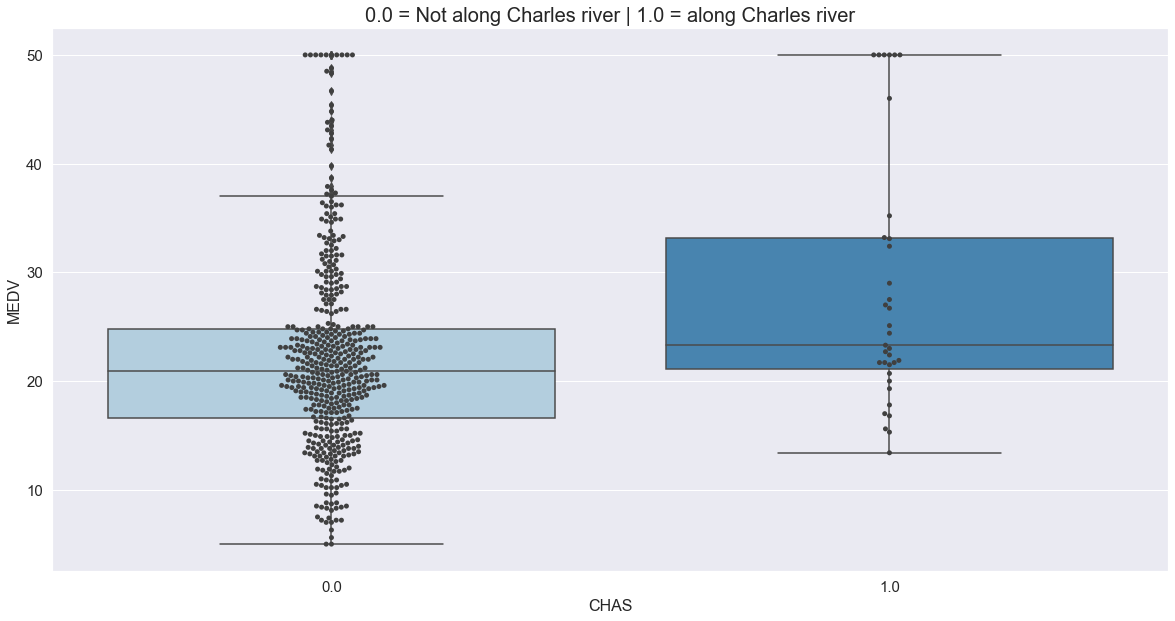

In [58]:
print('Plot 3')
ax = sns.boxplot(x="CHAS", y="MEDV", data=df, palette="Blues")
ax.axes.set_title("0.0 = Not along Charles river | 1.0 = along Charles river",fontsize=20)
ax.set_xlabel("CHAS",fontsize=16)
ax.set_ylabel("MEDV",fontsize=16)
ax.tick_params(labelsize=15)
ax = sns.swarmplot(x="CHAS", y="MEDV", data=df, color=".25")
plt.show()

#### t-test
The t-test compares the means of the Median Values for houses along the Charles river and those not along the Charles river to evaluate whether their means are statistically different from each other. Below an independent t-test is performed as both groups can be considered independent from each other. 

A pvalue of >0.05 allows us to reject the null hypothesis. According to the t-test the likelihood of both same being from within the same poplulation is 0.0036. The t-test assumes normally distributed samples, as we can see from the histogram in **Plot 3** both the groups have positive skew, with tail's and outliers extending to the right.

In [14]:
print('The pvalue below of >0.05 indicates that the two groups are not from the same sample')
stats.ttest_ind(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0], equal_var=False)

The pvalue below of >0.05 indicates that the two groups are not from the same sample


Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

This low pvalue gives good evidence that houses alongside the Charles river are more valuable because they are alongside the Charles river

#### ANOVA
Analysis of Variance (ANOVA) is another inferential statistical technique we can use to analyse whether there is a significant difference median house prices between houses that are along the Charles river and those that are not. 

ANOVA looks at the variation between the groups, and the variation within groups. It is normally used to compare means among more than two-groups. We use it here as a second point of reference since there is strong overlap between the two groups of housing types. 

Again the significant level is >0.05, in fact it is considerably less by being a negative value. We can again conslude that there is a significant between the median housing value of the two groups and infer that houses along the Charles river are move valuable.

In [15]:
stats.f_oneway(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0])

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

# Predict
![title](images\predict.jpg)
##### Ms Marvel (Carol Danvers) the Boston based Superhero with pre-cognative "seventh sense" powers. Perhaps she can make some predictions about housing in Boston too
##### Copyright https://www.marvel.com/characters/captain-marvel-carol-danvers/in-comics 

### Summary and conclusions
I would not use this 



![title](chart.jpg)


In [57]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# Import Libraries for preprocessing
import sklearn.preprocessing as pre

In [54]:
# Create a dataframe for pre-processing containing the independent variables 
x = df.iloc[:, 0:13]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
# Create a dataframe containing the dependent variable (median housing value) as the target for the neural network
target = df.iloc[:, 13:14]
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### Fitting and Transforming

In [20]:
scaler = pre.StandardScaler()
scaler.fit(x)
scaler.mean_, scaler.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [56]:
xscale = pd.DataFrame(scaler.transform(x), columns=x.columns)
xscale.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


#### Whiting

In [22]:
x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [23]:
# Import the package for whitening the independent variables
import sklearn.decomposition as dec

In [43]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x)
xwhite = pd.DataFrame(pca.transform(x), columns=x.columns)
xwhite.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.442349,-0.058772,-0.561435,-1.531040,0.822704,-0.681737,-0.994737,-1.286443,-0.249317,0.717917,-0.350396,-0.187928,0.410944
1,0.373080,-0.481149,0.226867,0.588060,-0.109557,-0.960939,-0.551883,-0.569500,0.222428,0.947985,-0.244951,-0.003076,-1.127680
2,0.137314,-0.613501,1.193672,0.527421,-0.415970,-0.963338,-0.895862,-0.490694,-0.188889,0.335032,-0.723139,-0.071185,-0.232339
3,0.375406,-0.472747,0.761846,0.293020,-1.081061,-1.082361,-1.076608,-0.168214,0.139815,1.041601,-0.842222,0.176528,0.724858
4,0.542192,-0.323423,1.131118,0.293138,-1.093583,-1.081808,-0.955003,-0.001589,-0.138771,1.289912,-0.519205,0.093117,0.365659


In [25]:
# Display the whitening of the independent variables to check there correlations are close to Zero (rounded) 
xwhite.corr().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
ZN,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
INDUS,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
CHAS,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
NOX,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
RM,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
AGE,0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
DIS,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0
RAD,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0
TAX,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0


In [161]:
# Import libraries for the neural network
from keras import Sequential
from keras.layers import Dense
from keras import metrics
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot
import pydot

# Build our model and add layers to the neural network
m = kr.models.Sequential()
# Add the layers and adjust to optimise the network
m.add(kr.layers.Dense(5, input_dim=13, activation='tanh'))
m.add(kr.layers.Dense(5, activation='linear'))
m.add(kr.layers.Dense(10, activation='sigmoid'))
#m.add(kr.layers.Dense(5, activation='linear'))
m.add(kr.layers.Dense(1, activation='linear'))

m.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mae, metrics.categorical_accuracy])

In [136]:
# Create x and y values for the neural network
x = xwhite
y = target

In [147]:
# Train the neural network
m.fit(x, y,epochs=2000, batch_size=5)

Epoch 1/2000
506/506 [==============================] - 0s 246us/step - loss: 3.6341 - mean_absolute_error: 1.4407 - categorical_accuracy: 1.0000
Epoch 2/2000
506/506 [==============================] - 0s 225us/step - loss: 3.7033 - mean_absolute_error: 1.4560 - categorical_accuracy: 1.0000
Epoch 3/2000
506/506 [==============================] - 0s 215us/step - loss: 3.7072 - mean_absolute_error: 1.4504 - categorical_accuracy: 1.0000
Epoch 4/2000
506/506 [==============================] - 0s 209us/step - loss: 3.5957 - mean_absolute_error: 1.4321 - categorical_accuracy: 1.0000
Epoch 5/2000
506/506 [==============================] - 0s 199us/step - loss: 3.6358 - mean_absolute_error: 1.4399 - categorical_accuracy: 1.0000
Epoch 6/2000
506/506 [==============================] - 0s 201us/step - loss: 3.6691 - mean_absolute_error: 1.4496 - categorical_accuracy: 1.0000
Epoch 7/2000
506/506 [==============================] - 0s 203us/step - loss: 3.6221 - mean_absolute_error: 1.4418 - categor

506/506 [==============================] - 0s 207us/step - loss: 3.6081 - mean_absolute_error: 1.4308 - categorical_accuracy: 1.0000
Epoch 57/2000
506/506 [==============================] - 0s 199us/step - loss: 3.5983 - mean_absolute_error: 1.4251 - categorical_accuracy: 1.0000
Epoch 58/2000
506/506 [==============================] - 0s 191us/step - loss: 3.6368 - mean_absolute_error: 1.4355 - categorical_accuracy: 1.0000
Epoch 59/2000
506/506 [==============================] - 0s 195us/step - loss: 3.5978 - mean_absolute_error: 1.4439 - categorical_accuracy: 1.0000
Epoch 60/2000
506/506 [==============================] - 0s 195us/step - loss: 3.6342 - mean_absolute_error: 1.4335 - categorical_accuracy: 1.0000
Epoch 61/2000
506/506 [==============================] - 0s 197us/step - loss: 3.5683 - mean_absolute_error: 1.4249 - categorical_accuracy: 1.0000
Epoch 62/2000
506/506 [==============================] - 0s 189us/step - loss: 3.6100 - mean_absolute_error: 1.4347 - categorical_ac

506/506 [==============================] - 0s 197us/step - loss: 3.6245 - mean_absolute_error: 1.4402 - categorical_accuracy: 1.0000
Epoch 112/2000
506/506 [==============================] - 0s 191us/step - loss: 3.5287 - mean_absolute_error: 1.4129 - categorical_accuracy: 1.0000
Epoch 113/2000
506/506 [==============================] - 0s 193us/step - loss: 3.5582 - mean_absolute_error: 1.4265 - categorical_accuracy: 1.0000
Epoch 114/2000
506/506 [==============================] - 0s 199us/step - loss: 3.5574 - mean_absolute_error: 1.4203 - categorical_accuracy: 1.0000
Epoch 115/2000
506/506 [==============================] - 0s 199us/step - loss: 3.5661 - mean_absolute_error: 1.4347 - categorical_accuracy: 1.0000
Epoch 116/2000
506/506 [==============================] - 0s 199us/step - loss: 3.5956 - mean_absolute_error: 1.4283 - categorical_accuracy: 1.0000
Epoch 117/2000
506/506 [==============================] - 0s 199us/step - loss: 3.6296 - mean_absolute_error: 1.4435 - categori

506/506 [==============================] - 0s 203us/step - loss: 3.5570 - mean_absolute_error: 1.4210 - categorical_accuracy: 1.0000
Epoch 167/2000
506/506 [==============================] - 0s 195us/step - loss: 3.5278 - mean_absolute_error: 1.4210 - categorical_accuracy: 1.0000
Epoch 168/2000
506/506 [==============================] - 0s 193us/step - loss: 3.5299 - mean_absolute_error: 1.4147 - categorical_accuracy: 1.0000
Epoch 169/2000
506/506 [==============================] - 0s 191us/step - loss: 3.5413 - mean_absolute_error: 1.4273 - categorical_accuracy: 1.0000
Epoch 170/2000
506/506 [==============================] - 0s 195us/step - loss: 3.5879 - mean_absolute_error: 1.4267 - categorical_accuracy: 1.0000
Epoch 171/2000
506/506 [==============================] - 0s 193us/step - loss: 3.5648 - mean_absolute_error: 1.4299 - categorical_accuracy: 1.0000
Epoch 172/2000
506/506 [==============================] - 0s 193us/step - loss: 3.5329 - mean_absolute_error: 1.4239 - categori

506/506 [==============================] - 0s 201us/step - loss: 3.4940 - mean_absolute_error: 1.4082 - categorical_accuracy: 1.0000
Epoch 221/2000
506/506 [==============================] - 0s 211us/step - loss: 3.5330 - mean_absolute_error: 1.4082 - categorical_accuracy: 1.0000
Epoch 222/2000
506/506 [==============================] - 0s 197us/step - loss: 3.5796 - mean_absolute_error: 1.4292 - categorical_accuracy: 1.0000
Epoch 223/2000
506/506 [==============================] - 0s 199us/step - loss: 3.5947 - mean_absolute_error: 1.4429 - categorical_accuracy: 1.0000
Epoch 224/2000
506/506 [==============================] - 0s 195us/step - loss: 3.5531 - mean_absolute_error: 1.4287 - categorical_accuracy: 1.0000
Epoch 225/2000
506/506 [==============================] - 0s 197us/step - loss: 3.6392 - mean_absolute_error: 1.4403 - categorical_accuracy: 1.0000
Epoch 226/2000
506/506 [==============================] - 0s 201us/step - loss: 3.5441 - mean_absolute_error: 1.4273 - categori

506/506 [==============================] - 0s 199us/step - loss: 3.5309 - mean_absolute_error: 1.4157 - categorical_accuracy: 1.0000
Epoch 276/2000
506/506 [==============================] - 0s 193us/step - loss: 3.4741 - mean_absolute_error: 1.4067 - categorical_accuracy: 1.0000
Epoch 277/2000
506/506 [==============================] - 0s 193us/step - loss: 3.5307 - mean_absolute_error: 1.4222 - categorical_accuracy: 1.0000
Epoch 278/2000
506/506 [==============================] - 0s 201us/step - loss: 3.5634 - mean_absolute_error: 1.4200 - categorical_accuracy: 1.0000
Epoch 279/2000
506/506 [==============================] - 0s 197us/step - loss: 3.4864 - mean_absolute_error: 1.4121 - categorical_accuracy: 1.0000
Epoch 280/2000
506/506 [==============================] - 0s 193us/step - loss: 3.4884 - mean_absolute_error: 1.4096 - categorical_accuracy: 1.0000
Epoch 281/2000
506/506 [==============================] - 0s 199us/step - loss: 3.4665 - mean_absolute_error: 1.3990 - categori

506/506 [==============================] - 0s 209us/step - loss: 3.4313 - mean_absolute_error: 1.4026 - categorical_accuracy: 1.0000
Epoch 331/2000
506/506 [==============================] - 0s 223us/step - loss: 3.5215 - mean_absolute_error: 1.4148 - categorical_accuracy: 1.0000
Epoch 332/2000
506/506 [==============================] - 0s 193us/step - loss: 3.5903 - mean_absolute_error: 1.4365 - categorical_accuracy: 1.0000
Epoch 333/2000
506/506 [==============================] - 0s 193us/step - loss: 3.4891 - mean_absolute_error: 1.4150 - categorical_accuracy: 1.0000
Epoch 334/2000
506/506 [==============================] - 0s 195us/step - loss: 3.5062 - mean_absolute_error: 1.4088 - categorical_accuracy: 1.0000
Epoch 335/2000
506/506 [==============================] - 0s 195us/step - loss: 3.4705 - mean_absolute_error: 1.3987 - categorical_accuracy: 1.0000
Epoch 336/2000
506/506 [==============================] - 0s 191us/step - loss: 3.5366 - mean_absolute_error: 1.4216 - categori

506/506 [==============================] - 0s 233us/step - loss: 3.5571 - mean_absolute_error: 1.4254 - categorical_accuracy: 1.0000
Epoch 386/2000
506/506 [==============================] - 0s 244us/step - loss: 3.4997 - mean_absolute_error: 1.4180 - categorical_accuracy: 1.0000
Epoch 387/2000
506/506 [==============================] - 0s 233us/step - loss: 3.5092 - mean_absolute_error: 1.4164 - categorical_accuracy: 1.0000
Epoch 388/2000
506/506 [==============================] - 0s 233us/step - loss: 3.4688 - mean_absolute_error: 1.4068 - categorical_accuracy: 1.0000
Epoch 389/2000
506/506 [==============================] - 0s 237us/step - loss: 3.4491 - mean_absolute_error: 1.4056 - categorical_accuracy: 1.0000
Epoch 390/2000
506/506 [==============================] - 0s 240us/step - loss: 3.4481 - mean_absolute_error: 1.4041 - categorical_accuracy: 1.0000
Epoch 391/2000
506/506 [==============================] - 0s 223us/step - loss: 3.4430 - mean_absolute_error: 1.4012 - categori

506/506 [==============================] - 0s 252us/step - loss: 3.4185 - mean_absolute_error: 1.3930 - categorical_accuracy: 1.0000
Epoch 441/2000
506/506 [==============================] - 0s 199us/step - loss: 3.4452 - mean_absolute_error: 1.3984 - categorical_accuracy: 1.0000
Epoch 442/2000
506/506 [==============================] - 0s 252us/step - loss: 3.4319 - mean_absolute_error: 1.4005 - categorical_accuracy: 1.0000
Epoch 443/2000
506/506 [==============================] - 0s 282us/step - loss: 3.4345 - mean_absolute_error: 1.4041 - categorical_accuracy: 1.0000
Epoch 444/2000
506/506 [==============================] - 0s 276us/step - loss: 3.4241 - mean_absolute_error: 1.3958 - categorical_accuracy: 1.0000
Epoch 445/2000
506/506 [==============================] - 0s 235us/step - loss: 3.4344 - mean_absolute_error: 1.3907 - categorical_accuracy: 1.0000
Epoch 446/2000
506/506 [==============================] - 0s 201us/step - loss: 3.4514 - mean_absolute_error: 1.4187 - categori

506/506 [==============================] - 0s 298us/step - loss: 3.4213 - mean_absolute_error: 1.3923 - categorical_accuracy: 1.0000
Epoch 496/2000
506/506 [==============================] - 0s 278us/step - loss: 3.4628 - mean_absolute_error: 1.4114 - categorical_accuracy: 1.0000
Epoch 497/2000
506/506 [==============================] - 0s 276us/step - loss: 3.4368 - mean_absolute_error: 1.4005 - categorical_accuracy: 1.0000
Epoch 498/2000
506/506 [==============================] - 0s 286us/step - loss: 3.3943 - mean_absolute_error: 1.3854 - categorical_accuracy: 1.0000
Epoch 499/2000
506/506 [==============================] - 0s 286us/step - loss: 3.4035 - mean_absolute_error: 1.3993 - categorical_accuracy: 1.0000
Epoch 500/2000
506/506 [==============================] - 0s 270us/step - loss: 3.4824 - mean_absolute_error: 1.4124 - categorical_accuracy: 1.0000
Epoch 501/2000
506/506 [==============================] - 0s 278us/step - loss: 3.4254 - mean_absolute_error: 1.4056 - categori

506/506 [==============================] - 0s 227us/step - loss: 3.4029 - mean_absolute_error: 1.3956 - categorical_accuracy: 1.0000
Epoch 550/2000
506/506 [==============================] - 0s 195us/step - loss: 3.4208 - mean_absolute_error: 1.4068 - categorical_accuracy: 1.0000
Epoch 551/2000
506/506 [==============================] - 0s 197us/step - loss: 3.5157 - mean_absolute_error: 1.4294 - categorical_accuracy: 1.0000
Epoch 552/2000
506/506 [==============================] - 0s 197us/step - loss: 3.4098 - mean_absolute_error: 1.3923 - categorical_accuracy: 1.0000
Epoch 553/2000
506/506 [==============================] - 0s 205us/step - loss: 3.4061 - mean_absolute_error: 1.3845 - categorical_accuracy: 1.0000
Epoch 554/2000
506/506 [==============================] - 0s 201us/step - loss: 3.4405 - mean_absolute_error: 1.4091 - categorical_accuracy: 1.0000
Epoch 555/2000
506/506 [==============================] - 0s 197us/step - loss: 3.4597 - mean_absolute_error: 1.4047 - categori

506/506 [==============================] - 0s 254us/step - loss: 3.4115 - mean_absolute_error: 1.3921 - categorical_accuracy: 1.0000
Epoch 605/2000
506/506 [==============================] - 0s 250us/step - loss: 3.4415 - mean_absolute_error: 1.4124 - categorical_accuracy: 1.0000
Epoch 606/2000
506/506 [==============================] - 0s 197us/step - loss: 3.3916 - mean_absolute_error: 1.3912 - categorical_accuracy: 1.0000
Epoch 607/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3923 - mean_absolute_error: 1.3891 - categorical_accuracy: 1.0000
Epoch 608/2000
506/506 [==============================] - 0s 197us/step - loss: 3.3861 - mean_absolute_error: 1.3930 - categorical_accuracy: 1.0000
Epoch 609/2000
506/506 [==============================] - 0s 221us/step - loss: 3.4344 - mean_absolute_error: 1.3952 - categorical_accuracy: 1.0000
Epoch 610/2000
506/506 [==============================] - 0s 248us/step - loss: 3.5125 - mean_absolute_error: 1.4197 - categori

506/506 [==============================] - 0s 199us/step - loss: 3.4120 - mean_absolute_error: 1.3886 - categorical_accuracy: 1.0000
Epoch 660/2000
506/506 [==============================] - 0s 191us/step - loss: 3.6272 - mean_absolute_error: 1.4406 - categorical_accuracy: 1.0000
Epoch 661/2000
506/506 [==============================] - 0s 203us/step - loss: 3.4729 - mean_absolute_error: 1.4064 - categorical_accuracy: 1.0000
Epoch 662/2000
506/506 [==============================] - 0s 197us/step - loss: 3.4066 - mean_absolute_error: 1.3992 - categorical_accuracy: 1.0000
Epoch 663/2000
506/506 [==============================] - 0s 191us/step - loss: 3.3893 - mean_absolute_error: 1.3912 - categorical_accuracy: 1.0000
Epoch 664/2000
506/506 [==============================] - 0s 199us/step - loss: 3.3691 - mean_absolute_error: 1.3855 - categorical_accuracy: 1.0000
Epoch 665/2000
506/506 [==============================] - 0s 197us/step - loss: 3.3735 - mean_absolute_error: 1.3935 - categori

506/506 [==============================] - 0s 240us/step - loss: 3.4011 - mean_absolute_error: 1.4007 - categorical_accuracy: 1.0000
Epoch 715/2000
506/506 [==============================] - 0s 199us/step - loss: 3.5158 - mean_absolute_error: 1.4053 - categorical_accuracy: 1.0000
Epoch 716/2000
506/506 [==============================] - 0s 195us/step - loss: 3.4462 - mean_absolute_error: 1.4040 - categorical_accuracy: 1.0000
Epoch 717/2000
506/506 [==============================] - 0s 201us/step - loss: 3.3953 - mean_absolute_error: 1.3946 - categorical_accuracy: 1.0000
Epoch 718/2000
506/506 [==============================] - 0s 223us/step - loss: 3.4030 - mean_absolute_error: 1.3983 - categorical_accuracy: 1.0000
Epoch 719/2000
506/506 [==============================] - 0s 227us/step - loss: 3.3958 - mean_absolute_error: 1.3972 - categorical_accuracy: 1.0000
Epoch 720/2000
506/506 [==============================] - 0s 227us/step - loss: 3.4315 - mean_absolute_error: 1.3983 - categori

506/506 [==============================] - 0s 201us/step - loss: 3.3223 - mean_absolute_error: 1.3669 - categorical_accuracy: 1.0000
Epoch 769/2000
506/506 [==============================] - 0s 191us/step - loss: 3.4343 - mean_absolute_error: 1.4113 - categorical_accuracy: 1.0000
Epoch 770/2000
506/506 [==============================] - 0s 193us/step - loss: 3.4144 - mean_absolute_error: 1.4031 - categorical_accuracy: 1.0000
Epoch 771/2000
506/506 [==============================] - 0s 193us/step - loss: 3.4103 - mean_absolute_error: 1.4013 - categorical_accuracy: 1.0000
Epoch 772/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3964 - mean_absolute_error: 1.3834 - categorical_accuracy: 1.0000
Epoch 773/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3697 - mean_absolute_error: 1.3827 - categorical_accuracy: 1.0000
Epoch 774/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3832 - mean_absolute_error: 1.3932 - categori

506/506 [==============================] - 0s 197us/step - loss: 3.3659 - mean_absolute_error: 1.3817 - categorical_accuracy: 1.0000
Epoch 824/2000
506/506 [==============================] - 0s 195us/step - loss: 3.4034 - mean_absolute_error: 1.3884 - categorical_accuracy: 1.0000
Epoch 825/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3362 - mean_absolute_error: 1.3713 - categorical_accuracy: 1.0000
Epoch 826/2000
506/506 [==============================] - 0s 195us/step - loss: 3.4025 - mean_absolute_error: 1.3993 - categorical_accuracy: 1.0000
Epoch 827/2000
506/506 [==============================] - 0s 203us/step - loss: 3.3738 - mean_absolute_error: 1.3860 - categorical_accuracy: 1.0000
Epoch 828/2000
506/506 [==============================] - 0s 240us/step - loss: 3.3402 - mean_absolute_error: 1.3872 - categorical_accuracy: 1.0000
Epoch 829/2000
506/506 [==============================] - 0s 193us/step - loss: 3.3920 - mean_absolute_error: 1.3915 - categori

Epoch 878/2000
506/506 [==============================] - 0s 199us/step - loss: 3.4195 - mean_absolute_error: 1.3975 - categorical_accuracy: 1.0000
Epoch 879/2000
506/506 [==============================] - 0s 197us/step - loss: 3.4590 - mean_absolute_error: 1.4165 - categorical_accuracy: 1.0000
Epoch 880/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3751 - mean_absolute_error: 1.3912 - categorical_accuracy: 1.0000
Epoch 881/2000
506/506 [==============================] - 0s 238us/step - loss: 3.3879 - mean_absolute_error: 1.3953 - categorical_accuracy: 1.0000
Epoch 882/2000
506/506 [==============================] - 0s 253us/step - loss: 3.5227 - mean_absolute_error: 1.4189 - categorical_accuracy: 1.0000
Epoch 883/2000
506/506 [==============================] - 0s 231us/step - loss: 3.4320 - mean_absolute_error: 1.4001 - categorical_accuracy: 1.0000
Epoch 884/2000
506/506 [==============================] - 0s 209us/step - loss: 3.3540 - mean_absolute_error: 1.

506/506 [==============================] - 0s 203us/step - loss: 3.3287 - mean_absolute_error: 1.3785 - categorical_accuracy: 1.0000
Epoch 934/2000
506/506 [==============================] - 0s 203us/step - loss: 3.3297 - mean_absolute_error: 1.3720 - categorical_accuracy: 1.0000
Epoch 935/2000
506/506 [==============================] - 0s 199us/step - loss: 3.3119 - mean_absolute_error: 1.3674 - categorical_accuracy: 1.0000
Epoch 936/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3807 - mean_absolute_error: 1.3847 - categorical_accuracy: 1.0000
Epoch 937/2000
506/506 [==============================] - 0s 205us/step - loss: 3.3612 - mean_absolute_error: 1.3885 - categorical_accuracy: 1.0000
Epoch 938/2000
506/506 [==============================] - 0s 197us/step - loss: 3.3467 - mean_absolute_error: 1.3896 - categorical_accuracy: 1.0000
Epoch 939/2000
506/506 [==============================] - 0s 193us/step - loss: 3.5201 - mean_absolute_error: 1.4227 - categori

506/506 [==============================] - 0s 280us/step - loss: 3.3761 - mean_absolute_error: 1.3968 - categorical_accuracy: 1.0000
Epoch 989/2000
506/506 [==============================] - 0s 294us/step - loss: 3.3567 - mean_absolute_error: 1.3829 - categorical_accuracy: 1.0000
Epoch 990/2000
506/506 [==============================] - 0s 266us/step - loss: 3.3930 - mean_absolute_error: 1.4100 - categorical_accuracy: 1.0000
Epoch 991/2000
506/506 [==============================] - 0s 284us/step - loss: 3.3595 - mean_absolute_error: 1.3847 - categorical_accuracy: 1.0000
Epoch 992/2000
506/506 [==============================] - 0s 246us/step - loss: 3.3257 - mean_absolute_error: 1.3775 - categorical_accuracy: 1.0000
Epoch 993/2000
506/506 [==============================] - 0s 248us/step - loss: 3.3577 - mean_absolute_error: 1.3927 - categorical_accuracy: 1.0000
Epoch 994/2000
506/506 [==============================] - 0s 270us/step - loss: 3.3340 - mean_absolute_error: 1.3789 - categori

506/506 [==============================] - 0s 197us/step - loss: 3.3738 - mean_absolute_error: 1.3907 - categorical_accuracy: 1.0000
Epoch 1044/2000
506/506 [==============================] - 0s 209us/step - loss: 3.3494 - mean_absolute_error: 1.3800 - categorical_accuracy: 1.0000
Epoch 1045/2000
506/506 [==============================] - 0s 229us/step - loss: 3.4025 - mean_absolute_error: 1.3978 - categorical_accuracy: 1.0000
Epoch 1046/2000
506/506 [==============================] - 0s 203us/step - loss: 3.3762 - mean_absolute_error: 1.3851 - categorical_accuracy: 1.0000
Epoch 1047/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3697 - mean_absolute_error: 1.4006 - categorical_accuracy: 1.0000
Epoch 1048/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3812 - mean_absolute_error: 1.3961 - categorical_accuracy: 1.0000
Epoch 1049/2000
506/506 [==============================] - 0s 199us/step - loss: 3.3395 - mean_absolute_error: 1.3733 - ca

506/506 [==============================] - 0s 199us/step - loss: 3.3305 - mean_absolute_error: 1.3808 - categorical_accuracy: 1.0000
Epoch 1099/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3182 - mean_absolute_error: 1.3769 - categorical_accuracy: 1.0000
Epoch 1100/2000
506/506 [==============================] - 0s 191us/step - loss: 3.2934 - mean_absolute_error: 1.3641 - categorical_accuracy: 1.0000
Epoch 1101/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3250 - mean_absolute_error: 1.3772 - categorical_accuracy: 1.0000
Epoch 1102/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3849 - mean_absolute_error: 1.4009 - categorical_accuracy: 1.0000
Epoch 1103/2000
506/506 [==============================] - 0s 201us/step - loss: 3.3082 - mean_absolute_error: 1.3779 - categorical_accuracy: 1.0000
Epoch 1104/2000
506/506 [==============================] - 0s 215us/step - loss: 3.3110 - mean_absolute_error: 1.3781 - ca

506/506 [==============================] - 0s 201us/step - loss: 3.4892 - mean_absolute_error: 1.4039 - categorical_accuracy: 1.0000
Epoch 1154/2000
506/506 [==============================] - 0s 199us/step - loss: 3.3434 - mean_absolute_error: 1.3884 - categorical_accuracy: 1.0000
Epoch 1155/2000
506/506 [==============================] - 0s 191us/step - loss: 3.3224 - mean_absolute_error: 1.3795 - categorical_accuracy: 1.0000
Epoch 1156/2000
506/506 [==============================] - 0s 197us/step - loss: 3.2933 - mean_absolute_error: 1.3712 - categorical_accuracy: 1.0000
Epoch 1157/2000
506/506 [==============================] - 0s 191us/step - loss: 3.3352 - mean_absolute_error: 1.3895 - categorical_accuracy: 1.0000
Epoch 1158/2000
506/506 [==============================] - 0s 191us/step - loss: 3.2910 - mean_absolute_error: 1.3738 - categorical_accuracy: 1.0000
Epoch 1159/2000
506/506 [==============================] - 0s 193us/step - loss: 3.3169 - mean_absolute_error: 1.3857 - ca

506/506 [==============================] - 0s 197us/step - loss: 3.3277 - mean_absolute_error: 1.3854 - categorical_accuracy: 1.0000
Epoch 1209/2000
506/506 [==============================] - 0s 193us/step - loss: 3.3241 - mean_absolute_error: 1.3868 - categorical_accuracy: 1.0000
Epoch 1210/2000
506/506 [==============================] - 0s 193us/step - loss: 3.3058 - mean_absolute_error: 1.3732 - categorical_accuracy: 1.0000
Epoch 1211/2000
506/506 [==============================] - 0s 193us/step - loss: 3.4756 - mean_absolute_error: 1.4086 - categorical_accuracy: 1.0000
Epoch 1212/2000
506/506 [==============================] - 0s 201us/step - loss: 3.3230 - mean_absolute_error: 1.3869 - categorical_accuracy: 1.0000
Epoch 1213/2000
506/506 [==============================] - 0s 193us/step - loss: 3.7574 - mean_absolute_error: 1.4461 - categorical_accuracy: 1.0000
Epoch 1214/2000
506/506 [==============================] - 0s 195us/step - loss: 3.3643 - mean_absolute_error: 1.3906 - ca

506/506 [==============================] - 0s 298us/step - loss: 3.3351 - mean_absolute_error: 1.3722 - categorical_accuracy: 1.0000
Epoch 1264/2000
506/506 [==============================] - 0s 329us/step - loss: 3.2974 - mean_absolute_error: 1.3767 - categorical_accuracy: 1.0000
Epoch 1265/2000
506/506 [==============================] - 0s 321us/step - loss: 3.2859 - mean_absolute_error: 1.3680 - categorical_accuracy: 1.0000
Epoch 1266/2000
506/506 [==============================] - 0s 323us/step - loss: 3.4197 - mean_absolute_error: 1.3993 - categorical_accuracy: 1.0000
Epoch 1267/2000
506/506 [==============================] - 0s 550us/step - loss: 3.4047 - mean_absolute_error: 1.4142 - categorical_accuracy: 1.0000
Epoch 1268/2000
506/506 [==============================] - 0s 777us/step - loss: 3.3074 - mean_absolute_error: 1.3778 - categorical_accuracy: 1.0000
Epoch 1269/2000
506/506 [==============================] - 0s 958us/step - loss: 3.2488 - mean_absolute_error: 1.3703 - ca

506/506 [==============================] - 0s 199us/step - loss: 3.2434 - mean_absolute_error: 1.3667 - categorical_accuracy: 1.0000
Epoch 1319/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2581 - mean_absolute_error: 1.3687 - categorical_accuracy: 1.0000
Epoch 1320/2000
506/506 [==============================] - 0s 207us/step - loss: 3.3128 - mean_absolute_error: 1.3809 - categorical_accuracy: 1.0000
Epoch 1321/2000
506/506 [==============================] - 0s 231us/step - loss: 3.2746 - mean_absolute_error: 1.3703 - categorical_accuracy: 1.0000
Epoch 1322/2000
506/506 [==============================] - 0s 235us/step - loss: 3.2464 - mean_absolute_error: 1.3581 - categorical_accuracy: 1.0000
Epoch 1323/2000
506/506 [==============================] - 0s 237us/step - loss: 3.2911 - mean_absolute_error: 1.3691 - categorical_accuracy: 1.0000
Epoch 1324/2000
506/506 [==============================] - 0s 205us/step - loss: 3.3028 - mean_absolute_error: 1.3761 - ca

506/506 [==============================] - 0s 217us/step - loss: 3.2550 - mean_absolute_error: 1.3602 - categorical_accuracy: 1.0000
Epoch 1374/2000
506/506 [==============================] - 0s 197us/step - loss: 3.3527 - mean_absolute_error: 1.3831 - categorical_accuracy: 1.0000
Epoch 1375/2000
506/506 [==============================] - 0s 191us/step - loss: 3.2233 - mean_absolute_error: 1.3554 - categorical_accuracy: 1.0000
Epoch 1376/2000
506/506 [==============================] - 0s 191us/step - loss: 3.2581 - mean_absolute_error: 1.3574 - categorical_accuracy: 1.0000
Epoch 1377/2000
506/506 [==============================] - 0s 211us/step - loss: 3.3071 - mean_absolute_error: 1.3773 - categorical_accuracy: 1.0000
Epoch 1378/2000
506/506 [==============================] - 0s 290us/step - loss: 3.2824 - mean_absolute_error: 1.3732 - categorical_accuracy: 1.0000
Epoch 1379/2000
506/506 [==============================] - 0s 266us/step - loss: 3.2545 - mean_absolute_error: 1.3655 - ca

506/506 [==============================] - 0s 201us/step - loss: 3.2489 - mean_absolute_error: 1.3668 - categorical_accuracy: 1.0000
Epoch 1429/2000
506/506 [==============================] - 0s 199us/step - loss: 3.2414 - mean_absolute_error: 1.3604 - categorical_accuracy: 1.0000
Epoch 1430/2000
506/506 [==============================] - 0s 191us/step - loss: 3.2128 - mean_absolute_error: 1.3555 - categorical_accuracy: 1.0000
Epoch 1431/2000
506/506 [==============================] - 0s 189us/step - loss: 3.3266 - mean_absolute_error: 1.3780 - categorical_accuracy: 1.0000
Epoch 1432/2000
506/506 [==============================] - 0s 201us/step - loss: 3.2910 - mean_absolute_error: 1.3826 - categorical_accuracy: 1.0000
Epoch 1433/2000
506/506 [==============================] - 0s 197us/step - loss: 3.3012 - mean_absolute_error: 1.3759 - categorical_accuracy: 1.0000
Epoch 1434/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2308 - mean_absolute_error: 1.3586 - ca

506/506 [==============================] - 0s 213us/step - loss: 3.2586 - mean_absolute_error: 1.3649 - categorical_accuracy: 1.0000
Epoch 1484/2000
506/506 [==============================] - 0s 197us/step - loss: 3.2542 - mean_absolute_error: 1.3602 - categorical_accuracy: 1.0000
Epoch 1485/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2024 - mean_absolute_error: 1.3432 - categorical_accuracy: 1.0000
Epoch 1486/2000
506/506 [==============================] - 0s 195us/step - loss: 3.2183 - mean_absolute_error: 1.3575 - categorical_accuracy: 1.0000
Epoch 1487/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2429 - mean_absolute_error: 1.3635 - categorical_accuracy: 1.0000
Epoch 1488/2000
506/506 [==============================] - 0s 199us/step - loss: 3.2273 - mean_absolute_error: 1.3560 - categorical_accuracy: 1.0000
Epoch 1489/2000
506/506 [==============================] - 0s 201us/step - loss: 3.2156 - mean_absolute_error: 1.3518 - ca

506/506 [==============================] - 0s 268us/step - loss: 3.1912 - mean_absolute_error: 1.3415 - categorical_accuracy: 1.0000
Epoch 1539/2000
506/506 [==============================] - 0s 274us/step - loss: 3.2505 - mean_absolute_error: 1.3715 - categorical_accuracy: 1.0000
Epoch 1540/2000
506/506 [==============================] - 0s 266us/step - loss: 3.2098 - mean_absolute_error: 1.3548 - categorical_accuracy: 1.0000
Epoch 1541/2000
506/506 [==============================] - 0s 274us/step - loss: 3.2613 - mean_absolute_error: 1.3599 - categorical_accuracy: 1.0000
Epoch 1542/2000
506/506 [==============================] - 0s 268us/step - loss: 3.2406 - mean_absolute_error: 1.3705 - categorical_accuracy: 1.0000
Epoch 1543/2000
506/506 [==============================] - 0s 272us/step - loss: 3.2519 - mean_absolute_error: 1.3598 - categorical_accuracy: 1.0000
Epoch 1544/2000
506/506 [==============================] - 0s 264us/step - loss: 3.2010 - mean_absolute_error: 1.3500 - ca

506/506 [==============================] - 0s 203us/step - loss: 3.2707 - mean_absolute_error: 1.3580 - categorical_accuracy: 1.0000
Epoch 1594/2000
506/506 [==============================] - 0s 191us/step - loss: 3.2239 - mean_absolute_error: 1.3566 - categorical_accuracy: 1.0000
Epoch 1595/2000
506/506 [==============================] - 0s 207us/step - loss: 3.2528 - mean_absolute_error: 1.3595 - categorical_accuracy: 1.0000
Epoch 1596/2000
506/506 [==============================] - 0s 197us/step - loss: 3.2304 - mean_absolute_error: 1.3624 - categorical_accuracy: 1.0000
Epoch 1597/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2253 - mean_absolute_error: 1.3593 - categorical_accuracy: 1.0000
Epoch 1598/2000
506/506 [==============================] - 0s 191us/step - loss: 3.2412 - mean_absolute_error: 1.3645 - categorical_accuracy: 1.0000
Epoch 1599/2000
506/506 [==============================] - 0s 195us/step - loss: 3.2514 - mean_absolute_error: 1.3593 - ca

506/506 [==============================] - 0s 203us/step - loss: 3.1913 - mean_absolute_error: 1.3539 - categorical_accuracy: 1.0000
Epoch 1649/2000
506/506 [==============================] - 0s 193us/step - loss: 3.1953 - mean_absolute_error: 1.3551 - categorical_accuracy: 1.0000
Epoch 1650/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2964 - mean_absolute_error: 1.3699 - categorical_accuracy: 1.0000
Epoch 1651/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2332 - mean_absolute_error: 1.3603 - categorical_accuracy: 1.0000
Epoch 1652/2000
506/506 [==============================] - 0s 199us/step - loss: 3.2435 - mean_absolute_error: 1.3637 - categorical_accuracy: 1.0000
Epoch 1653/2000
506/506 [==============================] - 0s 195us/step - loss: 3.2177 - mean_absolute_error: 1.3513 - categorical_accuracy: 1.0000
Epoch 1654/2000
506/506 [==============================] - 0s 189us/step - loss: 3.1892 - mean_absolute_error: 1.3481 - ca

506/506 [==============================] - 0s 199us/step - loss: 3.2009 - mean_absolute_error: 1.3544 - categorical_accuracy: 1.0000
Epoch 1704/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2708 - mean_absolute_error: 1.3671 - categorical_accuracy: 1.0000
Epoch 1705/2000
506/506 [==============================] - 0s 199us/step - loss: 3.2313 - mean_absolute_error: 1.3543 - categorical_accuracy: 1.0000
Epoch 1706/2000
506/506 [==============================] - 0s 191us/step - loss: 3.2520 - mean_absolute_error: 1.3608 - categorical_accuracy: 1.0000
Epoch 1707/2000
506/506 [==============================] - 0s 199us/step - loss: 3.2278 - mean_absolute_error: 1.3650 - categorical_accuracy: 1.0000
Epoch 1708/2000
506/506 [==============================] - 0s 195us/step - loss: 3.1845 - mean_absolute_error: 1.3463 - categorical_accuracy: 1.0000
Epoch 1709/2000
506/506 [==============================] - 0s 221us/step - loss: 3.2393 - mean_absolute_error: 1.3623 - ca

Epoch 1758/2000
506/506 [==============================] - 0s 201us/step - loss: 3.1813 - mean_absolute_error: 1.3398 - categorical_accuracy: 1.0000
Epoch 1759/2000
506/506 [==============================] - 0s 209us/step - loss: 3.1506 - mean_absolute_error: 1.3348 - categorical_accuracy: 1.0000
Epoch 1760/2000
506/506 [==============================] - 0s 235us/step - loss: 3.2670 - mean_absolute_error: 1.3715 - categorical_accuracy: 1.0000
Epoch 1761/2000
506/506 [==============================] - 0s 286us/step - loss: 3.3064 - mean_absolute_error: 1.3794 - categorical_accuracy: 1.0000
Epoch 1762/2000
506/506 [==============================] - 0s 203us/step - loss: 3.2086 - mean_absolute_error: 1.3498 - categorical_accuracy: 1.0000
Epoch 1763/2000
506/506 [==============================] - 0s 195us/step - loss: 3.1862 - mean_absolute_error: 1.3512 - categorical_accuracy: 1.0000
Epoch 1764/2000
506/506 [==============================] - 0s 211us/step - loss: 3.2113 - mean_absolute_er

Epoch 1813/2000
506/506 [==============================] - 0s 199us/step - loss: 3.2096 - mean_absolute_error: 1.3609 - categorical_accuracy: 1.0000
Epoch 1814/2000
506/506 [==============================] - 0s 221us/step - loss: 3.1704 - mean_absolute_error: 1.3437 - categorical_accuracy: 1.0000
Epoch 1815/2000
506/506 [==============================] - 0s 237us/step - loss: 3.2159 - mean_absolute_error: 1.3489 - categorical_accuracy: 1.0000
Epoch 1816/2000
506/506 [==============================] - 0s 256us/step - loss: 3.1843 - mean_absolute_error: 1.3501 - categorical_accuracy: 1.0000
Epoch 1817/2000
506/506 [==============================] - 0s 231us/step - loss: 3.2471 - mean_absolute_error: 1.3590 - categorical_accuracy: 1.0000
Epoch 1818/2000
506/506 [==============================] - 0s 207us/step - loss: 3.2461 - mean_absolute_error: 1.3581 - categorical_accuracy: 1.0000
Epoch 1819/2000
506/506 [==============================] - 0s 233us/step - loss: 3.3551 - mean_absolute_er

Epoch 1868/2000
506/506 [==============================] - 0s 201us/step - loss: 3.2466 - mean_absolute_error: 1.3576 - categorical_accuracy: 1.0000
Epoch 1869/2000
506/506 [==============================] - 0s 203us/step - loss: 3.1691 - mean_absolute_error: 1.3359 - categorical_accuracy: 1.0000
Epoch 1870/2000
506/506 [==============================] - 0s 193us/step - loss: 3.1821 - mean_absolute_error: 1.3374 - categorical_accuracy: 1.0000
Epoch 1871/2000
506/506 [==============================] - 0s 195us/step - loss: 3.2217 - mean_absolute_error: 1.3579 - categorical_accuracy: 1.0000
Epoch 1872/2000
506/506 [==============================] - 0s 191us/step - loss: 3.1802 - mean_absolute_error: 1.3340 - categorical_accuracy: 1.0000
Epoch 1873/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2021 - mean_absolute_error: 1.3567 - categorical_accuracy: 1.0000
Epoch 1874/2000
506/506 [==============================] - 0s 199us/step - loss: 3.2437 - mean_absolute_er

Epoch 1923/2000
506/506 [==============================] - 0s 191us/step - loss: 3.1768 - mean_absolute_error: 1.3529 - categorical_accuracy: 1.0000
Epoch 1924/2000
506/506 [==============================] - 0s 199us/step - loss: 3.1684 - mean_absolute_error: 1.3344 - categorical_accuracy: 1.0000
Epoch 1925/2000
506/506 [==============================] - 0s 238us/step - loss: 3.1464 - mean_absolute_error: 1.3301 - categorical_accuracy: 1.0000
Epoch 1926/2000
506/506 [==============================] - 0s 205us/step - loss: 3.1870 - mean_absolute_error: 1.3510 - categorical_accuracy: 1.0000
Epoch 1927/2000
506/506 [==============================] - 0s 211us/step - loss: 3.3126 - mean_absolute_error: 1.3761 - categorical_accuracy: 1.0000
Epoch 1928/2000
506/506 [==============================] - 0s 195us/step - loss: 3.2025 - mean_absolute_error: 1.3508 - categorical_accuracy: 1.0000
Epoch 1929/2000
506/506 [==============================] - 0s 189us/step - loss: 3.1381 - mean_absolute_er

Epoch 1978/2000
506/506 [==============================] - 0s 201us/step - loss: 3.1657 - mean_absolute_error: 1.3404 - categorical_accuracy: 1.0000
Epoch 1979/2000
506/506 [==============================] - 0s 199us/step - loss: 3.1903 - mean_absolute_error: 1.3560 - categorical_accuracy: 1.0000
Epoch 1980/2000
506/506 [==============================] - 0s 193us/step - loss: 3.1971 - mean_absolute_error: 1.3479 - categorical_accuracy: 1.0000
Epoch 1981/2000
506/506 [==============================] - 0s 195us/step - loss: 3.1950 - mean_absolute_error: 1.3464 - categorical_accuracy: 1.0000
Epoch 1982/2000
506/506 [==============================] - 0s 193us/step - loss: 3.2165 - mean_absolute_error: 1.3499 - categorical_accuracy: 1.0000
Epoch 1983/2000
506/506 [==============================] - 0s 201us/step - loss: 3.2341 - mean_absolute_error: 1.3618 - categorical_accuracy: 1.0000
Epoch 1984/2000
506/506 [==============================] - 0s 195us/step - loss: 3.1643 - mean_absolute_er

In [149]:
# make preduction and put in the object 'p',it is returned as a numpy array
p = m.predict(x)

In [150]:
# put the prediction array into a panda's dataframe and give it the column heading P_MEDV (Predicted Median Value)
prediction_output = pd.DataFrame(p, columns=['P_MEDV'])

In [151]:
# Concatenate the prediction dataframe to the original dataframe and return as a new dataframe called output
output = pd.concat([df.iloc[:, 0:14], prediction_output], axis=1)

In [152]:
# display the first five rows output datafrome
output.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,P_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.886341
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,20.816710
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,35.631531
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,31.110538
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,33.150757


Plot 4


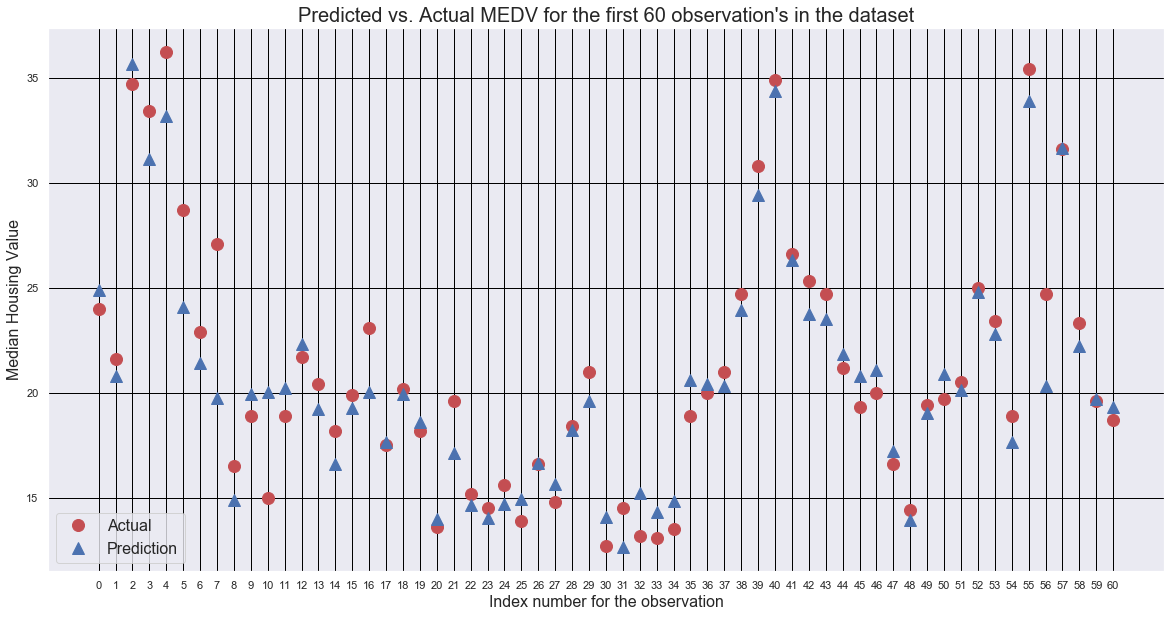

In [153]:
print('Plot 4')
# Adjust the loc slicer to return other observations, just remember to keep B_MEDV and P_MEDV the same
B_MEDV = output.loc[:60, 'MEDV'] 
P_MEDV = output.loc[:60, 'P_MEDV'] 

fig, ax = plt.subplots()
ax.plot(B_MEDV, color='r', marker='o', markersize=12, linestyle='', label="Actual")
ax.plot(P_MEDV, color='b', marker='^', markersize=12, linestyle='', label="Prediction")
ax.grid(color='black', linestyle='-', linewidth=1)
plt.xlabel("Index number for the observation", fontsize=16)
plt.ylabel("Median Housing Value", fontsize=16)
plt.title("Predicted vs. Actual MEDV for the first 60 observation's in the dataset", fontsize=20)
plt.legend(loc="best", fontsize=16)
plt.xticks(np.arange(0, 61, step=1))
plt.savefig("images\chart.jpg")
plt.show()


In [154]:
# Create a new column in the dataframe that is the difference between the Actual and Preducted values
output['DIFF'] = output['MEDV'] - output['P_MEDV']

In [155]:
# Display the predictive statistics for the difference between actual and predicted values
output['DIFF'].describe().round(2)

count    506.00
mean       0.07
std        1.78
min       -6.08
25%       -1.03
50%        0.10
75%        1.18
max       10.73
Name: DIFF, dtype: float64

In [162]:
plot_model(m, to_file='model.png')


ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

### References
https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class

https://blog.datarobot.com/ordinary-least-squares-in-python

https://pythonfordatascience.org/anova-python/#data

https://en.wikipedia.org/wiki/Ordinary_least_squares

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom

https://medium.com/@robertjohn_15390/simple-housing-price-prediction-using-neural-networks-with-tensorflow-8b486d3db3ca

(1997) The problem of multicollinearity. In: Understanding Regression Analysis. Springer, Boston, MA

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

https://www.kaggle.com/prasadperera/the-boston-housing-dataset

Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://keras.rstudio.com/articles/tutorial_basic_regression.html

https://github.com/topics/boston-housing-price-prediction?o=desc&s=updated